In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [50]:
cd C:\Users\HP\Downloads 

C:\Users\HP\Downloads


In [51]:
A = pd.read_csv('Stock Price.csv')
A['Date'] = pd.to_datetime(A['Date'])

In [52]:
A.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-06-25,0.370536,0.372768,0.359375,0.368304,0.294235,122001600
1,1990-06-26,0.372768,0.375000,0.360491,0.362723,0.289777,127254400
2,1990-06-27,0.363839,0.375000,0.359375,0.370536,0.296018,97227200
3,1990-06-28,0.381696,0.386161,0.372768,0.383929,0.306718,249939200
4,1990-06-29,0.383929,0.400670,0.381696,0.399554,0.319201,325192000


In [53]:
data = A.filter(['Close']).values
dataset = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [54]:
training_data_len = int(np.ceil(0.8 * len(dataset)))
train_data = scaled_data[0:training_data_len, :]

In [55]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [56]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [57]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

6591/6591 [==============================] - 238s 35ms/step - loss: 3.1721e-05


In [61]:
test_data = scaled_data[training_data_len - 60:, :]

In [62]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [63]:
x_test = np.array(x_test)

In [64]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [65]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

52/52 [==============================] - 3s 29ms/step


In [66]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 8.956818580627441


In [67]:
train = A[:training_data_len]
valid = A[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-67-13c7f75305e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


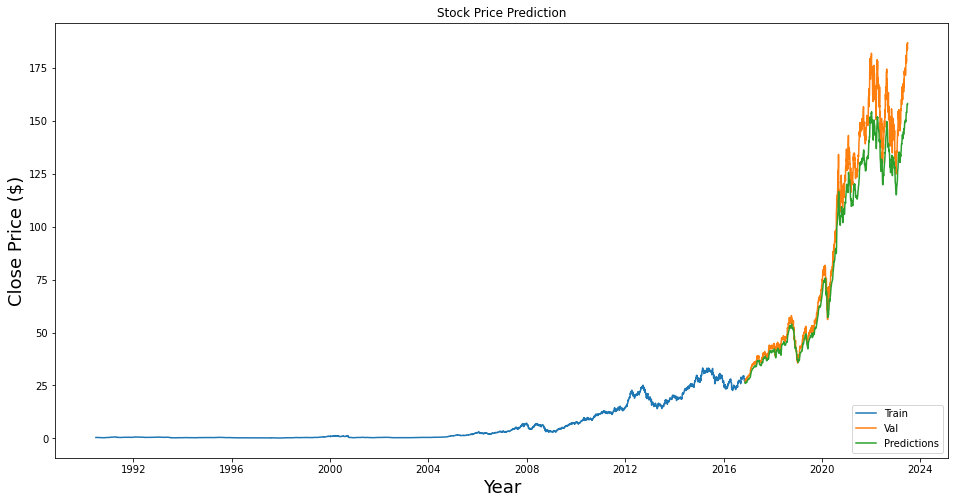

In [69]:
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Date'], train['Close'])
plt.plot(valid['Date'], valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()